In [7]:
#Mounts your google drive into this virtual machine

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Now we need to access the files downloaded, copy the path where you saved the files downloaded from the github repo and paste below
%cd /content/drive/MyDrive/path/to/files/cloned/from/repo/and/now/in/your/GoogleDrive/



In [ ]:
!pip install neurokit2
!pip install -U pandas-profiling

In [10]:
import os
import random
import time
import numpy as np
import pandas as pd
import matplotlib
import neurokit2 as nk
import matplotlib.pyplot as plt


from sklearn.cross_decomposition import CCA
from scipy import signal

from scipy.signal import butter, lfilter
from scipy.fft import fft, fftfreq, ifft

import pickle
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

## **Offline EDA data visualization and processing**

In [ ]:
#
data = pd.read_csv('/content/drive/MyDrive/CHANGEPATH/SharedPublicly/Data/EDA_RAW-2021-09-03_15-42-40.txt',header=4 ,sep=r'\s*,\s*',engine='python')
data.columns = ["Sample Index",	"EMG Channel 0",	"EMG Channel 1",	"EMG Channel 2",	"EMG Channel 3",	"EOG Channel 0",	"EOG Channel 1",	"EEG Channel 0",	"EEG Channel 1",	"EEG Channel 2",	"EEG Channel 3",	"EEG Channel 4",	"EEG Channel 5",	"EEG Channel 6",	"EEG Channel 7",	"EEG Channel 8",	"EEG Channel 9",	"PPG Channel 0",	"PPG Channel 1",	"EDA Channel 0",	"Other",	"Raw PC Timestamp",	"Raw Device Timestamp",	"Other.1",	"Timestamp",	"Marker",	"Timestamp (Formatted)"]
data

In [14]:
eda_signal =data["EDA Channel 0"]
signals, info = nk.eda_process(eda_signal, sampling_rate=250)
signals

,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,0.321080,0.321066,0.327784,-0.006719,0,0,0.0,0.0,0.0,0,0.0
1,0.321457,0.321332,0.327793,-0.006461,0,0,0.0,0.0,0.0,0,0.0
2,0.321827,0.321602,0.327802,-0.006200,0,0,0.0,0.0,0.0,0,0.0
3,0.322188,0.321875,0.327811,-0.005935,0,0,0.0,0.0,0.0,0,0.0
4,0.322549,0.322152,0.327819,-0.005668,0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
27412,0.471146,0.471106,0.464228,0.000069,0,0,0.0,0.0,0.0,0,0.0
27413,0.471162,0.471106,0.464228,0.000064,0,0,0.0,0.0,0.0,0,0.0
27414,0.471160,0.471106,0.464228,0.000059,0,0,0.0,0.0,0.0,0,0.0
27415,0.471158,0.471106,0.464228,0.000053,0,0,0.0,0.0,0.0,0,0.0


In [42]:
eda_signal_slice =data["EDA Channel 0"]
eda =nk.as_vector(eda_signal_slice[11000:15000])
eda
signals2, info = nk.eda_process(eda, sampling_rate=250)
signals2
cleaned2 = signals2["EDA_Clean"]
features2 = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]


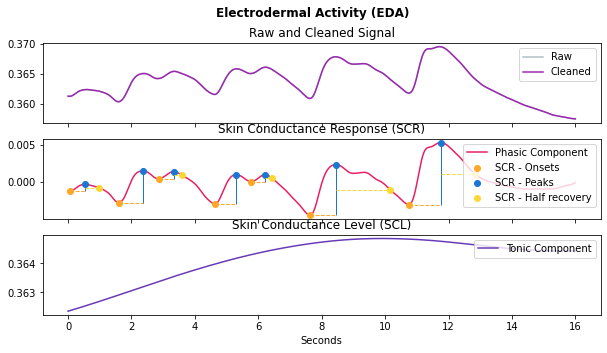

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [43]:
plt.rcParams['figure.figsize'] = [10, 5]
path = '/content/drive/MyDrive/CHANGEPATH/SharedPublicly/Figures/'
image_format = 'eps' # e.g .png, .svg, etc.
image_name = 'galea_eda.eps'
fig = nk.eda_plot(signals2, 250)
fig.savefig(path+image_name, format=image_format, dpi=1200)